In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
import cv2
import glob

In [2]:
DATADIR = "C:/ML_and_DL_project_Datasets/fruits-360/Training/*"

In [3]:
X_train = []

for dir_path in glob.glob("C:/ML_and_DL_project_Datasets/fruits-360/Training/*"):
    img_label = dir_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))
        X_train.append([img,img_label])

In [4]:
train_data = np.array(X_train)

In [5]:
train_data.shape

(41322, 2)

## Loading the test data

In [6]:
X_test = []

for dir_path in glob.glob("C:/ML_and_DL_project_Datasets/fruits-360/Test/*"):
    img_label = dir_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))
        X_test.append([img,img_label])

In [7]:
test_data = np.array(X_test)

In [8]:
test_data.shape

(13877, 2)

## The given dataset has 41k training images and around 14k test images

In [9]:
## We need to shuffle the dataset inorder to prevent the overfitting of training set

In [10]:
X_train = []
y_train = []
for features,labels in train_data:
    X_train.append(features)
    y_train.append(labels)
    

In [11]:
y_train[0]

'Training\\Apple Braeburn'

In [12]:
label_to_id = {v : k for k, v in enumerate(np.unique(y_train))}
id_to_label = {v : k for k, v in label_to_id.items()}

In [13]:
training_label_id = np.array([label_to_id[i] for i in y_train])

In [14]:
y_train = training_label_id

In [15]:
y_train = np.array(y_train)

In [16]:
len(np.unique(y_train))

81

In [17]:
X_train = np.array(X_train)

In [18]:
X_train = X_train/255.0

In [19]:
X_train[0]

array([[ 1.        ,  1.        ,  1.        , ...,  0.99607843,
         1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       ..., 
       [ 0.99607843,  0.99607843,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])

## Making our test data ready

In [20]:
X_test = []
y_test = []
for features,labels in test_data:
    X_test.append(features)
    y_test.append(labels)
    

In [21]:
X_test = np.array(X_test)

In [22]:
label_to_id = {v : k for k, v in enumerate(np.unique(y_test))}

In [23]:
y_ = np.array([label_to_id[i] for i in y_test])

In [24]:
len(np.unique(y_))

81

In [25]:
y_test = np.array(y_)

In [26]:
X_test = X_test/255.0

In [28]:
X_test[0].shape

(64, 64)

## Shuffling the train data

In [29]:
train_data =[]
train_data.append([X_train,y_train])

In [30]:
np.random.shuffle(train_data)

In [31]:
X_train = []
y_train = []
for feat,label in train_data:
    X_train.append(feat)
    y_train.append(label)
X_train = np.array(X_train)
y_train = np.array(y_train)


In [34]:
X_train.shape

(1, 41322, 64, 64)

# BUILDING THE MODEL

In [35]:
X_train = np.array(X_train).reshape(-1,64,64,1)

In [36]:
import keras

Using TensorFlow backend.


In [37]:
from keras.models import Sequential

In [38]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Activation

In [39]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Conv2D(filters=64,kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Conv2D(filters=64,kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=64))
model.add(Activation('relu'))

model.add(Dense(units=81))
model.add(Activation('softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])






In [40]:
y_train = keras.utils.to_categorical(y_train,num_classes=81)

In [41]:
y_train.shape

(1, 41322, 81)

In [42]:
y_train = y_train.reshape(41322,81)

In [45]:
X_train[0].shape

(64, 64, 1)

In [46]:
X_test[0].shape

(64, 64)

In [47]:
model.fit(X_train,y_train,epochs=10,batch_size=10)

Epoch 1/10
41322/41322 [==============================] - 1034s 25ms/step - loss: 1.2258 - acc: 0.6468
Epoch 2/10
41322/41322 [==============================] - 1010s 24ms/step - loss: 0.3230 - acc: 0.8946
Epoch 3/10
41322/41322 [==============================] - 1030s 25ms/step - loss: 0.2230 - acc: 0.9249
Epoch 4/10
41322/41322 [==============================] - 996s 24ms/step - loss: 0.1783 - acc: 0.9404
Epoch 5/10
41322/41322 [==============================] - 955s 23ms/step - loss: 0.1528 - acc: 0.9489
Epoch 6/10
41322/41322 [==============================] - 993s 24ms/step - loss: 0.1422 - acc: 0.9529
Epoch 7/10
41322/41322 [==============================] - 984s 24ms/step - loss: 0.1397 - acc: 0.9552
Epoch 8/10
41322/41322 [==============================] - 980s 24ms/step - loss: 0.1311 - acc: 0.9579
Epoch 9/10
41322/41322 [==============================] - 1010s 24ms/step - loss: 0.1253 - acc: 0.9601
Epoch 10/10
41322/41322 [==============================] - 1010s 24ms/step - l

# Preparing the test data for evaluation and prediction

In [50]:
X_test = np.array(X_test).reshape(-1,64,64,1)

In [56]:
y_test = keras.utils.to_categorical(y_test,81)

In [62]:
loss,acc = model.evaluate(X_test,y_test)

13877/13877 [==============================] - 45s 3ms/step


In [63]:
print('LOSS: ',loss)
print('ACCURACY: ',acc)

LOSS:  0.601253939623
ACCURACY:  0.859912084745


# PREDICTIONS

In [64]:
pred = model.predict(X_test)

In [74]:
pred.shape

(13877, 81)

In [75]:
y_test.shape

(13877, 81)

In [76]:
data_pred = np.argmax(y_test,axis=1)

In [77]:
my_pred = np.argmax(pred,axis=1)

In [80]:
from sklearn.metrics import classification_report,confusion_matrix

In [81]:
print(classification_report(data_pred,my_pred))

             precision    recall  f1-score   support

          0       1.00      0.65      0.79       164
          1       0.00      0.00      0.00       164
          2       0.85      0.81      0.83       164
          3       0.65      0.75      0.70       161
          4       0.72      0.63      0.67       164
          5       1.00      0.57      0.73       164
          6       0.74      0.70      0.72       164
          7       1.00      0.62      0.77       144
          8       1.00      0.92      0.96       166
          9       0.73      0.75      0.74       164
         10       0.67      1.00      0.80       164
         11       0.98      0.85      0.91       143
         12       0.88      1.00      0.94       166
         13       0.70      0.86      0.78       166
         14       0.98      0.49      0.65       166
         15       0.88      0.86      0.87       166
         16       0.00      0.00      0.00       164
         17       0.61      1.00      0.75   

C:\PythonIDE\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [82]:
print(confusion_matrix(data_pred,my_pred))

[[106   0   0 ...,   0   0   0]
 [  0   0  23 ...,   0   0   0]
 [  0   2 133 ...,   0   0   0]
 ..., 
 [  0   0   0 ..., 164   0   0]
 [  0   0   0 ...,   0 127   0]
 [  0   0   0 ...,   1   0 248]]


In [83]:
import seaborn as sns

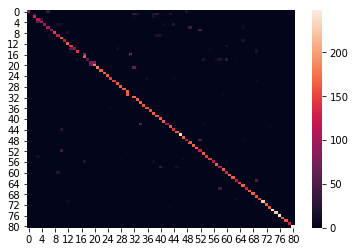

In [84]:
sns.heatmap(np.array(confusion_matrix(data_pred,my_pred)))